# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [60]:
# Import modules
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [61]:
# Open twitter-archive-enhanced.csv
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [62]:
# Create request
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Access content and write to file
with open (os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

# Open image-predictions.tsv     
image_predictions = pd.read_csv("image-predictions.tsv", sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [63]:
consumer_key = '****************'
consumer_secret = '****************'
access_token = '****************'
access_secret = '****************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweet_data = {}
tweet_data["tweets"] = []

for tweet in twitter_archive.tweet_id:
    try:
        tweets = api.get_status(tweet, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)._json
        tweet_data["tweets"].append(tweets)
    except tweepy.TweepError:
        pass
        
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data["tweets"], file, indent=2)

In [64]:
# Create DataFrame out of the tweet_json.txt file
twitter_counts = pd.read_json('tweet_json.txt')
twitter_counts = twitter_counts[['id','favorite_count','retweet_count']]
twitter_counts.rename(columns=({ 'id': 'tweet_id'}), inplace=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [65]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [66]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [67]:
twitter_counts

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34365,7142
1,892177421306343426,29789,5375
2,891815181378084864,22402,3541
3,891689557279858688,37542,7344
4,891327558926688256,35867,7888
5,891087950875897856,18105,2655
6,890971913173991426,10541,1700
7,890729181411237888,57729,16057
8,890609185150312448,24929,3681
9,890240255349198849,28414,6199


In [68]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [69]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [70]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Daisy           7
Toby            7
Buddy           7
Bailey          7
an              7
Bella           6
Rusty           6
Jack            6
Jax             6
Dave            6
Koda            6
Milo            6
Scout           6
Leo             6
Oscar           6
Stanley         6
George          5
             ... 
Aubie           1
Acro            1
Brooks          1
Mimosa          1
Vinnie          1
officially      1
Ronduh          1
Lupe            1
Rorie           1
Vince           1
Ito             1
Dixie           1
Zeek            1
Griswold        1
Nico            1
Lipton          1
Dunkin          1
Chuq            1
Ralphson        1
Batdog          1
Rhino           1
Alejandro       1
Scruffers       1
Sephie          1
Tassy     

In [71]:
sum(twitter_archive.duplicated())

0

In [72]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [73]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [74]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [75]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [76]:
sum(image_predictions.duplicated())

0

In [77]:
twitter_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
tweet_id          2328 non-null int64
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [78]:
twitter_counts.describe()

,tweet_id,favorite_count,retweet_count
count,2.328000e+03,2328.000000,2328.000000
mean,7.418403e+17,7168.045962,2516.390464
std,6.823143e+16,11136.599556,4260.783876
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1242.750000,507.000000
50%,7.180382e+17,3097.500000,1170.500000
75%,7.986673e+17,8746.500000,2913.250000
max,8.924206e+17,147190.000000,72126.000000


In [79]:
sum(twitter_counts.duplicated())

0

In [80]:
# Check for duplicated columns in all tables
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(twitter_counts))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues

##### twitter_archive table

1. Wrong or missing entries in column "names" (like "such", "quite", "a", "an", "the")

2. Multiple records are retweets instead of regular tweets

3. Multiple records are replies instead of regular tweets

4. Column "timestamp" is a string

5. Several ratings in column "rating_denominator" smaller or bigger than standard rating value (10)

6. Various records contain the same tweet url multiple times in the column "expanded_urls". Additionally some records contain a tweet url that is not a WeRateDogs tweet url


##### image_predictions table
7. Mixed entries with lowercase and uppercase in columns "p1", "p2", "p3"

8. Various prediction in p1, p2, and/or p3 are identifying the dog breed as non-dog values

### Tidiness issues

##### twitter_archive table
1. Column headers of columns 'doggo', 'floofer','pupper', 'puppo' are variable names

#####  twitter_counts
2. Columns favorite_count and retweet_count can be added to twitter_archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [81]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
images_clean = image_predictions.copy()
counts_clean = twitter_counts.copy()

## Quality issues

### twitter_archive table

### Issue #1: Wrong or missing entries in column "names" (like "such", "quite", "a", "an", "the")

#### Define
Various entries in "names" contain non-name entries. Search for all non-name values and replace them with "NaN". All non-name values are written in lowercase and can be selected and renamed. Additionally search and replace all values giving "None" with "NaN".

#### Code

In [82]:
# Create a variable with all lowercase values in the "name" column
lowercase_names = archive_clean[archive_clean.name.str.islower()].name

# Replace all lowercase values with NaN
archive_clean.name = archive_clean.name.replace(lowercase_names, np.NaN)

# Replace all "None" values with NaN
archive_clean.name = archive_clean.name.replace("None", np.NaN)

#### Test

In [83]:
archive_clean.name.value_counts()

Charlie         12
Cooper          11
Lucy            11
Oliver          11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
Sadie            8
Toby             7
Bailey           7
Daisy            7
Buddy            7
Jack             6
Bella            6
Jax              6
Milo             6
Rusty            6
Scout            6
Leo              6
Koda             6
Stanley          6
Dave             6
Oscar            6
Phil             5
Bentley          5
Sunny            5
Sammy            5
Chester          5
                ..
Lambeau          1
Rinna            1
Bobby            1
Tedrick          1
Lilah            1
Chase            1
Jeb              1
Theo             1
Cleopatricia     1
Siba             1
Wafer            1
Carll            1
DonDon           1
Combo            1
Grizz            1
Livvie           1
Shooter          1
Butters          1
Taz              1
Iroh             1
Wiggles          1
Severus     

### Issue #2: Multiple records are retweets instead of regular tweets

#### Define
A tweet is a retweet when the columns "retweetes_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" contain values. Query for missing values in "retweeted_status_id" to only show the real tweets of the account owner.

#### Code

In [84]:
archive_clean = archive_clean.query("retweeted_status_id == 'NaN'")

#### Test

In [85]:
archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

### Issue #3: Multiple records are replies instead of regular tweets

#### Define
A tweet is a reply when the columns "in_reply_to_status_id", and "in_reply_to_user_id" contain values. Query for missing values in "in_reply_to_status_id" to only show the real tweets of the account owner and to remove the replies.

#### Code

In [86]:
archive_clean = archive_clean.query("in_reply_to_status_id == 'NaN'")

#### Test

In [87]:
archive_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

### Issue #4: Column "timestamp" is a string

#### Define
The "timestamp" column is a string and needs to be converted into a datetime format.

#### Code

In [88]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1390 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### Issue #5: Several ratings in column "rating_denominator" smaller or bigger than standard rating value (10)


#### Define
To better compare the given data, we need to align the scale in "rating_denominator" and remove all rows with a denominator smaller or bigger than 10. So we query for and only get rows with "rating_denominator" equal to 10

#### Code

In [90]:
archive_clean = archive_clean.query("rating_denominator == '10'")

#### Test

In [91]:
archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Issue #6: Various records contain the same tweet url multiple times in the column "expanded_urls". Additionally some records contain a tweet url that is not a WeRateDogs tweet url


#### Define
We only want to keep one tweet url per line and want to make sure to only keep rows that contain a WeRateDogs url. The last item in every field for "expanded_urls" contains the value we want to keep. So split the given values with ',' as splitter and only display the last item in the column.

#### Code

In [92]:
# Split and only show the last item of the url column. Then save it as the new archive_clean.expanded_urls.
archive_clean.expanded_urls = archive_clean.expanded_urls.str.split(',', n=0).str[-1]

# Search for non-twitter-urls
remove_non_dog_rates = archive_clean[~archive_clean["expanded_urls"].str.contains("dog_rates", na=False)].index

# Drop non-twitter-urls
archive_clean.drop(remove_non_dog_rates, inplace=True)


#### Test

In [93]:
archive_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/776113305656188928/photo/1    1
https://twitter.com/dog_rates/status/826476773533745153/photo/1    1
https://twitter.com/dog_rates/status/670069087419133954/photo/1    1
https://twitter.com/dog_rates/status/674664755118911488/photo/1    1
https://twitter.com/dog_rates/status/666781792255496192/photo/1    1
https://twitter.com/dog_rates/status/807106840509214720/video/1    1
https://twitter.com/dog_rates/status/704847917308362754/photo/1    1
https://twitter.com/dog_rates/status/666418789513326592/photo/1    1
https://twitter.com/dog_rates/status/671138694582165504/photo/1    1
https://twitter.com/dog_rates/status/869227993411051520/photo/1    1
https://twitter.com/dog_rates/status/842163532590374912/photo/1    1
https://twitter.com/dog_rates/status/779834332596887552/photo/1    1
https://twitter.com/dog_rates/status/673350198937153538/photo/1    1
https://twitter.com/dog_rates/status/667549055577362432/photo/1    1
https://twitter.com/dog_rates/stat

### image_predictions table

### Issue #7: Mixed entries with lowercase and uppercase in columns "p1", "p2", "p3"

#### Define
The casing of the values in columns "p1", "p2", and "p3" is not uniform as values start with either lowercase or uppercase and additionaly carry an underscore for various values instead of a whitespace. I will replace all underscores in the values with a whitespace and then capitalize the first letter of each word.

#### Code

In [94]:
# Replace underscore with whitespace and capitalize first letter of each word in p1
images_clean.p1.replace("_", " ", inplace=True, regex=True)
images_clean.p1 = images_clean.p1.str.title()

# Replace underscore with whitespace and capitalize first letter of each word in p2
images_clean.p2.replace("_", " ", inplace=True, regex=True)
images_clean.p2 = images_clean.p2.str.title()

# Replace underscore with whitespace and capitalize first letter of each word in p2
images_clean.p3.replace("_", " ", inplace=True, regex=True)
images_clean.p3 = images_clean.p3.str.title()

#### Test

In [95]:
images_clean[["p1","p2","p3"]]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### Issue #8: Various prediction in p1, p2, and/or p3 are identifying the dog breed as non-dog values

#### Define
For various images the algorithm was not able to identify the dogs as a certain dog breeds. We remove all rows where there are either no dog breeds detected or the detection for "p1_dogs" provides a "False" by looking for the bolean "False" for all p1_dog, p2_dog, and p3_dog columns.

#### Code

In [96]:
images_clean = images_clean.loc[(images_clean['p1_dog']!=False) &(images_clean['p2_dog']!=False) & (images_clean['p3_dog']!=False)]

#### Test

In [97]:
images_clean.loc[(images_clean['p1_dog']==False) &(images_clean['p2_dog']==False) & (images_clean['p3_dog']==False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Tidiness issues

### twitter_archive table

### Issue #1.  Column headers of columns 'doggo', 'floofer','pupper', 'puppo' are variable names

#### Define
The header of the four columns 'doggo','floofer','pupper','puppo'contain variables. We can create one column "dog_stage" containing the actual dog_stage variable (if any) per row. After that we can delete the four columns 'doggo','floofer','pupper','puppo'.

#### Code

In [98]:
# Create a new column "dog_stage" with all the values from the columns "doggo","floofer","pupper","puppo"
archive_clean = archive_clean.assign(dog_stage = archive_clean.doggo + ', ' + archive_clean.floofer + ', ' + archive_clean.pupper + ', ' + archive_clean.puppo)

# Clean up the new column to only contain the dog stage values
archive_clean.dog_stage.replace({'None':'', ',':'',' ':'','doggopupper':'doggo','doggofloofer':'doggo','doggopuppo':'doggo'}, inplace=True, regex=True)

# Drop the not anymore needed columns 
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [99]:
archive_clean.dog_stage.value_counts()

           1651
pupper      201
doggo        73
puppo        22
floofer       7
Name: dog_stage, dtype: int64

### twitter_counts

### Issue #2. Columns "favorite_count" and "retweet_count" can be added to twitter_archive table

#### Define
Columns "favorite_count" and "retweet_count" contain information fitting thematically to the archive data. Therefore we merge the table "archive_clean" with the table ""counts_clean.

#### Code

In [100]:
archive_clean=pd.merge(archive_clean, counts_clean, on='tweet_id', how='inner')

#### Test

In [101]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 16 columns):
tweet_id                      1946 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1946 non-null datetime64[ns]
source                        1946 non-null object
text                          1946 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1946 non-null object
rating_numerator              1946 non-null int64
rating_denominator            1946 non-null int64
name                          1339 non-null object
dog_stage                     1946 non-null object
favorite_count                1946 non-null int64
retweet_count                 1946 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 258.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [102]:
twitter_archive_master = pd.merge(archive_clean, images_clean, on='tweet_id', how='inner')
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
4,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
5,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
6,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
7,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,Basenji,0.004633,True
8,889638837579907072,NaN,NaN,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,...,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True
9,889531135344209921,NaN,NaN,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,1,Golden Retriever,0.953442,True,Labrador Retriever,0.013834,True,Redbone,0.007958,True


In [103]:
# Drop columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" as they don't contain any values anymore and are not needed therefore. 
#twitter_archive_master = twitter_archive_master.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1);
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174 entries, 0 to 1173
Data columns (total 27 columns):
tweet_id                      1174 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1174 non-null datetime64[ns]
source                        1174 non-null object
text                          1174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1174 non-null object
rating_numerator              1174 non-null int64
rating_denominator            1174 non-null int64
name                          843 non-null object
dog_stage                     1174 non-null object
favorite_count                1174 non-null int64
retweet_count                 1174 non-null int64
jpg_url                       1174 non-null object
img_num                       1174 

In [104]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [105]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', index_col=0)
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
4,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
5,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
6,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
7,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,Basenji,0.004633,True
8,889638837579907072,NaN,NaN,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,...,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True
9,889531135344209921,NaN,NaN,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,1,Golden Retriever,0.953442,True,Labrador Retriever,0.013834,True,Redbone,0.007958,True


Check breed count based on most confident values in "p2" to look for most often used breed in tweets

In [106]:
twitter_archive_master.p1.value_counts()

Golden Retriever                  114
Pembroke                           77
Labrador Retriever                 69
Chihuahua                          50
Pug                                39
Pomeranian                         28
Chow                               26
Malamute                           26
Toy Poodle                         25
Samoyed                            24
Cocker Spaniel                     23
Miniature Pinscher                 20
French Bulldog                     19
German Shepherd                    17
Beagle                             17
Siberian Husky                     16
Shetland Sheepdog                  15
Chesapeake Bay Retriever           15
Shih-Tzu                           15
Staffordshire Bullterrier          15
Maltese Dog                        14
Rottweiler                         14
Cardigan                           14
Eskimo Dog                         14
Lakeland Terrier                   13
Italian Greyhound                  13
Great Pyrene

Check for most popular breeds amongst the followers

In [107]:
# Get the sum of the "favorite_count" per breed
breed = twitter_archive_master.groupby("p1")
favorite_sum = breed.favorite_count.sum()
favorite_sum.sort_values(ascending=False)

p1
Golden Retriever               1225225
Pembroke                        840447
Labrador Retriever              562763
Chihuahua                       419372
French Bulldog                  333379
Samoyed                         294620
Chow                            261926
Cocker Spaniel                  223768
Eskimo Dog                      205701
Malamute                        198494
Pug                             193695
Cardigan                        187273
Pomeranian                      179591
Lakeland Terrier                174544
Toy Poodle                      174423
Chesapeake Bay Retriever        168357
Miniature Pinscher              161802
German Shepherd                 154114
Great Pyrenees                  148346
Basset                          135959
Shetland Sheepdog               127641
English Springer                123036
Flat-Coated Retriever           118115
Italian Greyhound               111362
Rottweiler                      111134
Staffordshire Bullterr

In [108]:
# Get the mean of the "favorite_count" per breed
breed = twitter_archive_master.groupby("p1")
favorite_sum = breed.favorite_count.mean()
favorite_sum.sort_values(ascending=False)

p1
Irish Water Spaniel            22006.000000
Saluki                         21146.750000
Standard Poodle                18039.800000
French Bulldog                 17546.263158
Giant Schnauzer                14928.500000
Black-And-Tan Coonhound        14895.000000
Flat-Coated Retriever          14764.375000
Eskimo Dog                     14692.928571
English Springer               13670.666667
Lakeland Terrier               13426.461538
Cardigan                       13376.642857
Leonberg                       12862.333333
Great Pyrenees                 12362.166667
Basset                         12359.909091
Samoyed                        12275.833333
Border Terrier                 11869.000000
Chesapeake Bay Retriever       11223.800000
Pembroke                       10914.896104
Golden Retriever               10747.587719
Afghan Hound                   10559.000000
Tibetan Mastiff                10464.750000
Norwegian Elkhound             10426.500000
Bedlington Terrier           

Check the distribution and count of values in "rating_numerator"

In [109]:
# Check value distribution in "rating_numerator"
twitter_archive_master.rating_numerator.describe()

count    1174.000000
mean       10.952300
std         1.802085
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        27.000000
Name: rating_numerator, dtype: float64

In [110]:
# Check count for values in "rating_numerator"
twitter_archive_master.rating_numerator.value_counts()

12    305
10    254
11    242
13    173
9      93
8      50
14     17
7      15
5       9
6       8
4       4
27      1
26      1
3       1
2       1
Name: rating_numerator, dtype: int64

### Insights:
1. The most popular dog breed in all the tweets created is the Golden Retriever, followed by the Pembroke and the Labrador Retriever.

2. When looking at the sum of the favorite_count per breed the data shows that the number of counts is the highest for the Golden Retriever, followed by Pembroke and Labrador Retriever. The data suggests that these breeds are the most liked breeds. However when loking at the mean of the favorite_count per breed it shows that the most popular breeds are in fact are the Irish Water Spaniel, Saluki, and Standard Poodle. The Golden Retriever is placing 19th, suggesting. This suggests that the high count of votes is based on the high volumne of tweets with a Golden Retriever rather than on popularity amongst followers.

3. The mean of the given ratings per dog with 10.95 is exceeding the set denominator of 10. While dogs gets a high rating on average, there are still outliers present with a top rating of 26 and 27 ("extraordinary dog") or a low rating of 2 ("bad dog").

### Visualization

To visualize the number of dog breeds in the given tweets, I plot a bar chart with the top-10 occuring dog breeds.

Text(0.5,1,'Most popular dog breeds (based on number of occurences)')

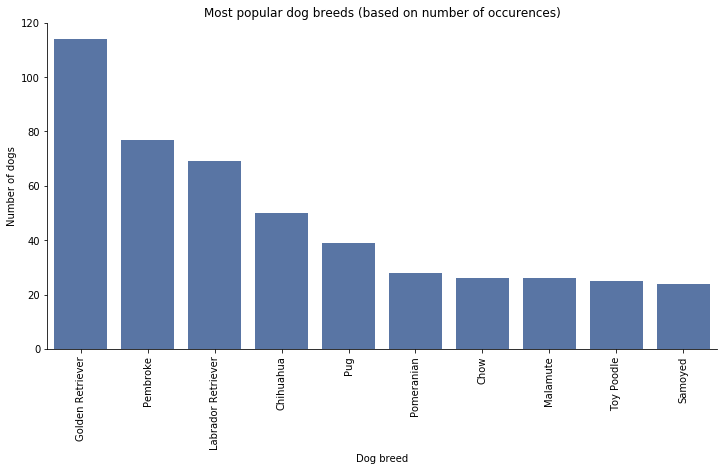

In [111]:
# Plot the number of dog breeds (based on column "p1" with the most accurate breed confidence)

plt.figure(figsize=[12,6])
freq = twitter_archive_master.p1.value_counts()
order = freq.iloc[:10].index
sb.countplot(data = twitter_archive_master, x="p1", order=order, color="#4C72B0");
plt.xticks(rotation=90)
plt.yticks([0,20,40,60,80,100,120])
sb.despine(bottom=False, left=False)
plt.xlabel("Dog breed")
plt.ylabel("Number of dogs")
plt.title("Most popular dog breeds (based on number of occurences)")

Additionally I plot the mean of the favorite count per dog breed to show that the despite appearing quite often in the previous chart, the most popular dogs in the tweets are not the most popular dogs according to the audience favorite count.

Text(0.5,1,'Mean of favorite count per dog breed')

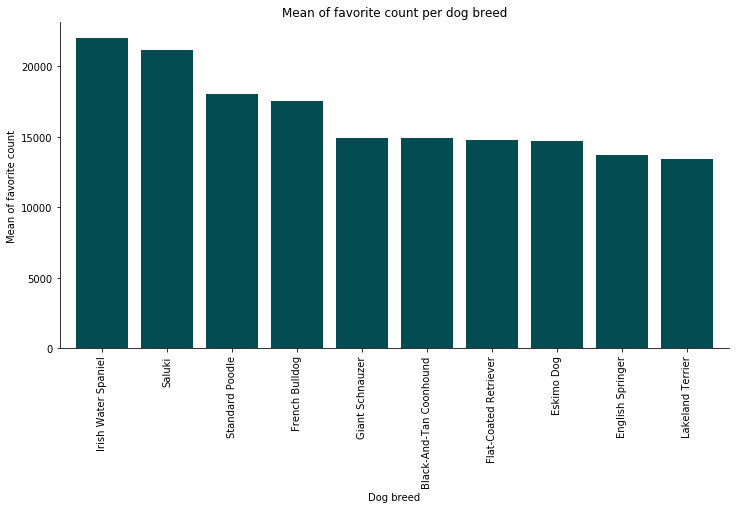

In [112]:
# Plot the mean of favorite count per dog breeds (based on column "p1" with the most accurate breed confidence)

plt.figure(figsize=[12,6])
breed = twitter_archive_master.groupby("p1")
favorite_sum = breed.favorite_count.mean()
summe = favorite_sum.sort_values(ascending=False)
order = summe.iloc[:10]
order.plot.bar(color="#034c52", width=0.8)
sb.despine(bottom=False, left=False)
plt.xlabel("Dog breed")
plt.ylabel("Mean of favorite count")
plt.title("Mean of favorite count per dog breed")